In [13]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [15]:
print("Названия сортов:", iris.target_names)
print("Целевые метки:", np.unique(iris.target))

Названия сортов: ['setosa' 'versicolor' 'virginica']
Целевые метки: [0 1 2]


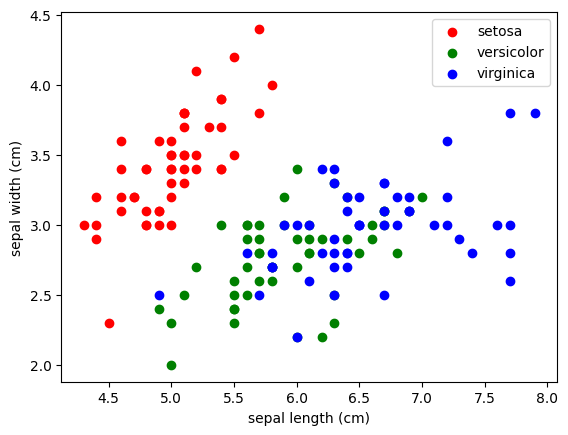

In [16]:
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(df[df.target == i]['sepal length (cm)'],
                df[df.target == i]['sepal width (cm)'],
                label=iris.target_names[i], c=colors[i])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

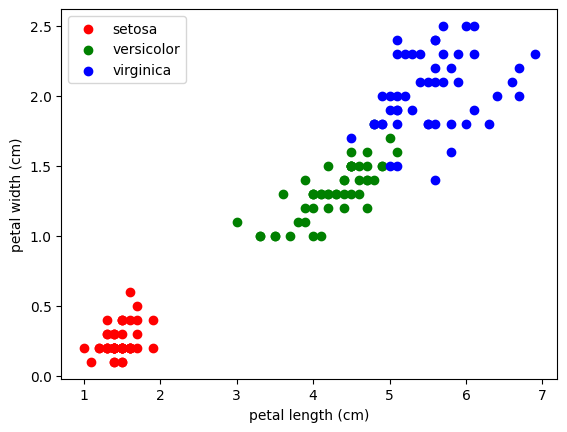

In [17]:
for i in range(3):
    plt.scatter(df[df.target == i]['petal length (cm)'],
                df[df.target == i]['petal width (cm)'],
                label=iris.target_names[i], c=colors[i])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

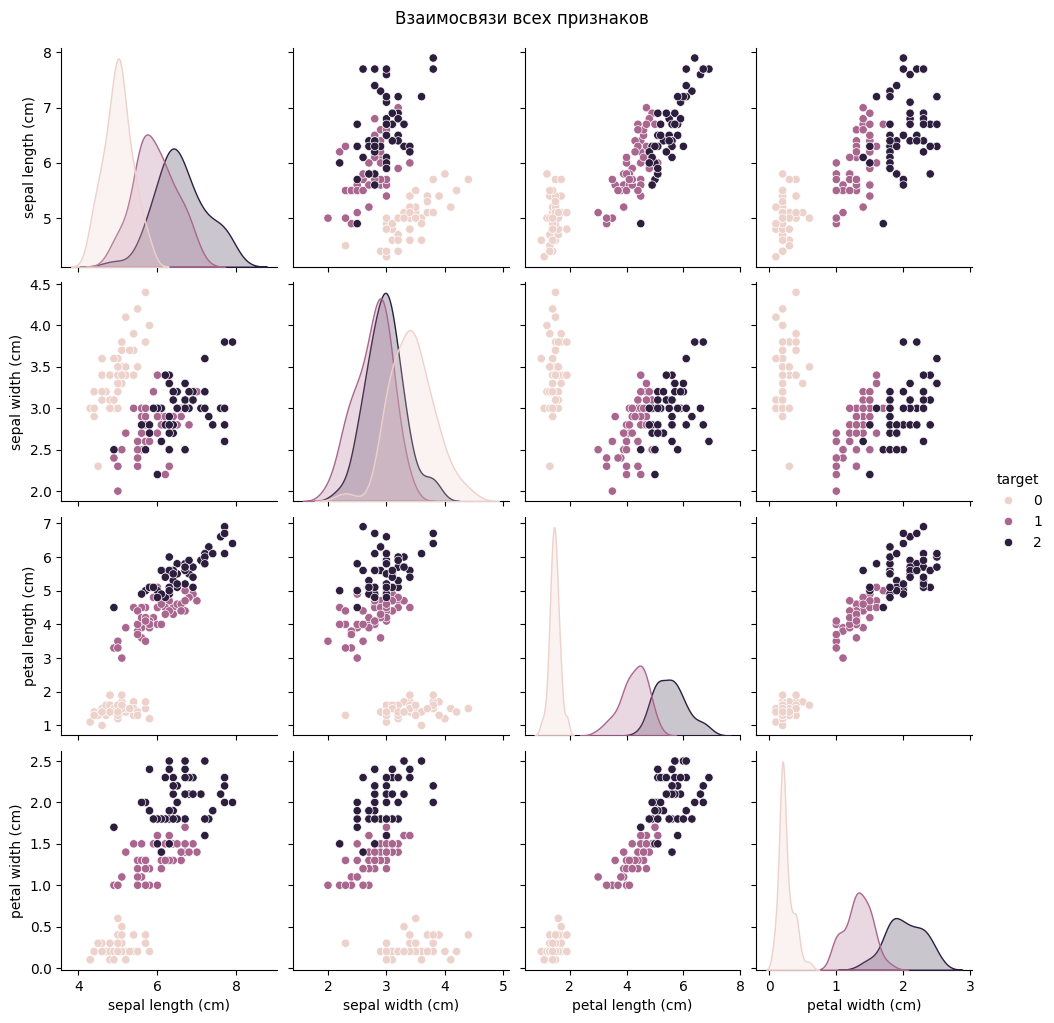

In [18]:
sns.pairplot(df, hue='target')
plt.suptitle('Взаимосвязи всех признаков', y=1.02)
plt.show()

In [19]:
df_0_1 = df[df.target.isin([0, 1])].copy()
df_1_2 = df[df.target.isin([1, 2])].copy()

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
X_01 = df_0_1.drop(columns='target')
y_01 = df_0_1['target']

X_train_01, X_test_01, y_train_01, y_test_01 = train_test_split(X_01, y_01, test_size=0.3, random_state=0)

clf_01 = LogisticRegression(random_state=0)
clf_01.fit(X_train_01, y_train_01)

y_pred_01 = clf_01.predict(X_test_01)
accuracy_01 = accuracy_score(y_test_01, y_pred_01)
print("Точность модели для Setosa/Versicolor:", accuracy_01)

Точность модели для Setosa/Versicolor: 1.0


In [24]:
X_12 = df_1_2.drop(columns='target')
y_12 = df_1_2['target']

X_train_12, X_test_12, y_train_12, y_test_12 = train_test_split(X_12, y_12, test_size=0.3, random_state=0)

clf_12 = LogisticRegression(random_state=0)
clf_12.fit(X_train_12, y_train_12)

y_pred_12 = clf_12.predict(X_test_12)
accuracy_12 = accuracy_score(y_test_12, y_pred_12)
print("Точность модели для Versicolor/Virginica:", accuracy_12)

Точность модели для Versicolor/Virginica: 0.9666666666666667


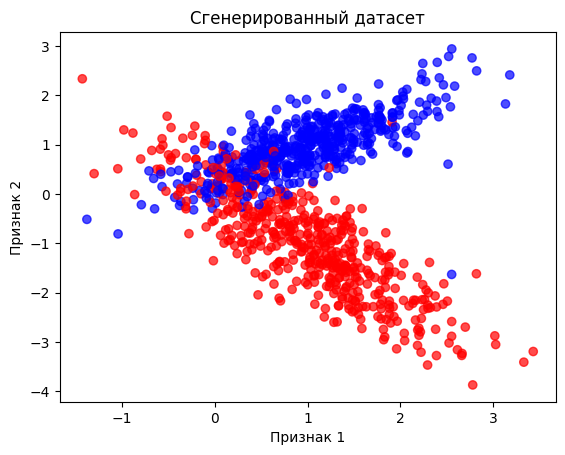

In [25]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("Сгенерированный датасет")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

In [26]:
X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(X, y, test_size=0.3, random_state=0)

clf_gen = LogisticRegression(random_state=0)
clf_gen.fit(X_train_gen, y_train_gen)

y_pred_gen = clf_gen.predict(X_test_gen)
accuracy_gen = accuracy_score(y_test_gen, y_pred_gen)
print("Точность модели для сгенерированных данных:", accuracy_gen)

Точность модели для сгенерированных данных: 0.9
